In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

Text(0, 0.5, 'Income')

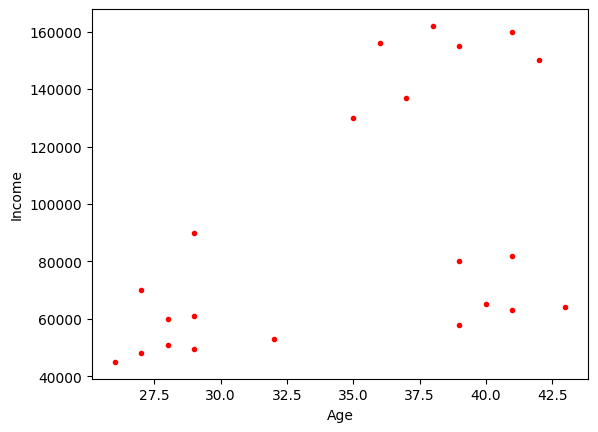

In [7]:
plt.scatter(df['Age'],df['Income($)'], color='red', marker='.')
plt.xlabel('Age')
plt.ylabel('Income')

In [8]:
from sklearn.cluster import KMeans

In [13]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [18]:
y_pred = km.fit_predict(df[['Age','Income($)']]) #[[]] == buat dataframe baru, karena tidak ingin memasukkan kolom selain kolom dua itu
y_pred

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [19]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


Text(0, 0.5, 'Income')

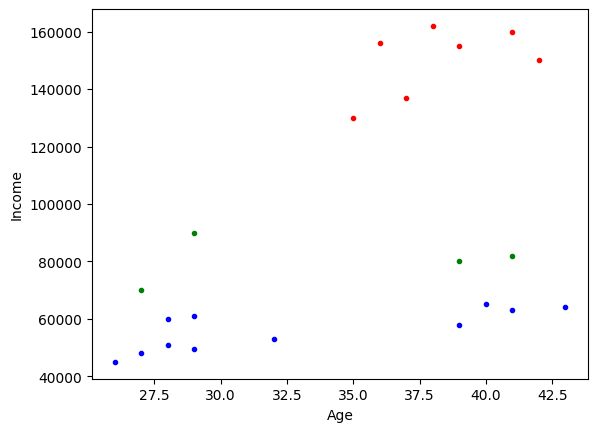

In [20]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['Age'],df0['Income($)'], color='red', marker='.')
plt.scatter(df1['Age'],df1['Income($)'], color='green', marker='.')
plt.scatter(df2['Age'],df2['Income($)'], color='blue', marker='.')

plt.xlabel('Age')
plt.ylabel('Income')

Terlihat masih ada yang tidak sesuai, karena dua alasan:
1. ini terjadi karena scalar nya terlalu besar, sehingga harus di standarisasi terlebih dahulu
2. Kemungkingan juga karena kita mengset n-clustenya dengan bebas, tanpa acuan menggunakan elbow method

Mari perbaiki

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(df[['Income($)']]) # lagi lagi [[]] untuk buat dataframe baru

MinMaxScaler()

In [33]:
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,1
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,0


In [36]:
scaler.fit(df[['Age']]) # lagi lagi [[]] untuk buat dataframe baru


MinMaxScaler()

In [37]:
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


Mari gunakan elbow method

In [38]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [39]:
sse

[5.434011511984241,
 2.091136388689264,
 0.47507834985202746,
 0.36877340764321853,
 0.26217927623358384,
 0.2678476893772345,
 0.24282832697519494,
 0.16687177077537388,
 0.10938598377142644]

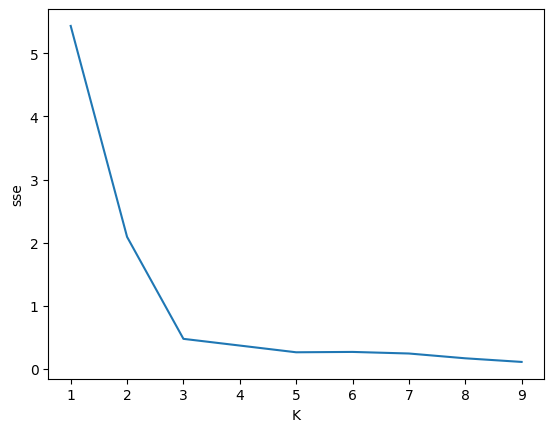

In [40]:
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse)

bisa dilihat kalau 3 adalah k centroid yang paling cocok

In [41]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [42]:
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


Text(0, 0.5, 'Income')

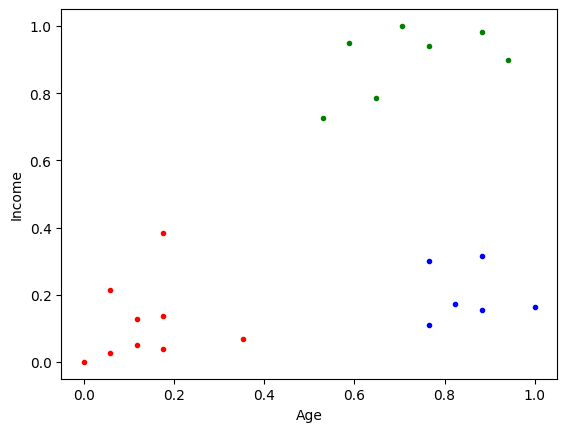

In [43]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['Age'],df0['Income($)'], color='red', marker='.')
plt.scatter(df1['Age'],df1['Income($)'], color='green', marker='.')
plt.scatter(df2['Age'],df2['Income($)'], color='blue', marker='.')

plt.xlabel('Age')
plt.ylabel('Income')

In [44]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income')

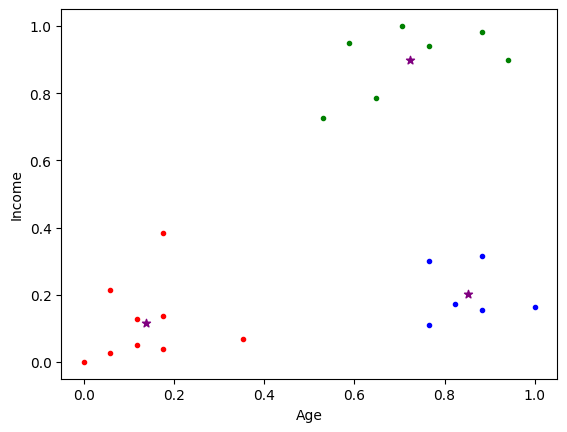

In [53]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['Age'],df0['Income($)'], color='red', marker='.')
plt.scatter(df1['Age'],df1['Income($)'], color='green', marker='.')
plt.scatter(df2['Age'],df2['Income($)'], color='blue', marker='.')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*')
# [:,0] maksudnya : => semua baris yang ada di km.cluster_centers_
# 0 => kolom pertama(kolom ke-0)
#[:,1] => semua baris di kolom kedua(kolom ke-1)

plt.xlabel('Age')
plt.ylabel('Income')

#### Kesimpulan

Kerja Baguss!